In [2]:
''' science behind the Auto Encoders '''

# - While training a deep neural network we try to maintain the same number of output units as of the input i.e. the
#   total number of features. However the in-between layers are less numbered. So this potentially looks like as if 
#   the DNN is trying to encode and decode the data we are feeding in. 

#   Hence if we have an m input features and n(<m) no of neurons in layer l, it implies that we learned to encode the 
#   features into n dimensions

''' Differentiator '''

#   Unlike traditional way of projections we are not completly ignoring the features that have less variance, but trying
#   to understand using all the features

In [3]:
# importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [4]:
# extracting data from standard sklearn libraries

data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [5]:
# defining the MinMax scaler for tranfroming the data, for faster and effecient training

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [6]:
# defining the parameters of the Deep Neural Network

n_input = 3
n_hidden = 2
n_output = 3
learn_rate = 0.01

In [7]:
# DNN architetcure

x = tf.placeholder(tf.float32, shape=[None,n_input])
hidden = fully_connected(x,n_hidden,activation_fn=None)
output = fully_connected(hidden,n_output,activation_fn=None)

In [8]:
# Optimization

loss = tf.reduce_mean(tf.square(output - x))
optimize = tf.train.AdamOptimizer(learn_rate)
train  = optimize.minimize(loss)

In [10]:
# Training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(2000):
        sess.run(train,feed_dict = {x:scaled_data})
        
    output2d = hidden.eval(feed_dict={x:scaled_data})

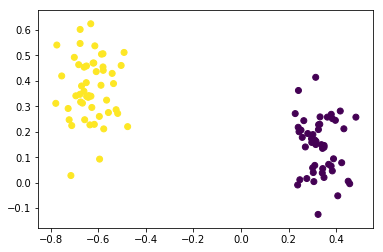

In [11]:
#Results

plt.scatter(output2d[:,0], output2d[:,1], c= data[1])